# Clase 9 Septiembre - Azure Data Scientist DSRP
## Preparación de datos I

### Dataset Utilizado: Hotel Booking

https://www.kaggle.com/code/touba7/hotel-booking

### Conexión Data Asset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from sklearn.feature_selection import VarianceThreshold

# CREDENCIALES AZURE
ml_client = MLClient.from_config(credential=DefaultAzureCredential())
# METADATA ASSET
data_asset = ml_client.data.get("booking-dsrp", version="1")


class DataProcessor:

    def __init__(self, data: pd.DataFrame):
        self.data = data

    def process_numeric(self):

       num_data = self.data.select_dtypes(include="numeric")

       selector = VarianceThreshold(threshold=0.1)
       selector.fit(num_data)
       return num_data


Found the config file in: /config.json


In [2]:
# LEER DATA ASSET
dataframe_reservas_hotel_raw = pd.read_csv(data_asset.path)
dataframe_reservas_hotel_raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### Metadata

In [3]:
dataframe_reservas_hotel_raw.shape

(119390, 36)

In [4]:
dataframe_reservas_hotel_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Exploración Inicial

In [7]:
dataframe_reservas_hotel_raw.describe(include="object")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [8]:
dataframe_reservas_hotel_raw["hotel"].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [9]:
dataframe_reservas_hotel_raw["distribution_channel"].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [10]:
dataframe_reservas_hotel_raw["customer_type"].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [25]:
dataframe_reservas_hotel_raw["is_canceled"].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [24]:
dataframe_reservas_hotel_raw["reservation_status"].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [11]:
dataframe_reservas_hotel_raw.describe(include="int64")

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,8.000000,5.000000


In [12]:
dataframe_reservas_hotel_raw.describe(include="float64")

,children,agent,company,adr
count,119386.000000,103050.000000,6797.000000,119390.000000
mean,0.103890,86.693382,189.266735,101.831122
std,0.398561,110.774548,131.655015,50.535790
min,0.000000,1.000000,6.000000,-6.380000
25%,0.000000,9.000000,62.000000,69.290000
50%,0.000000,14.000000,179.000000,94.575000
75%,0.000000,229.000000,270.000000,126.000000
max,10.000000,535.000000,543.000000,5400.000000


## EDA: Explorary Data Analysis

<Axes: >

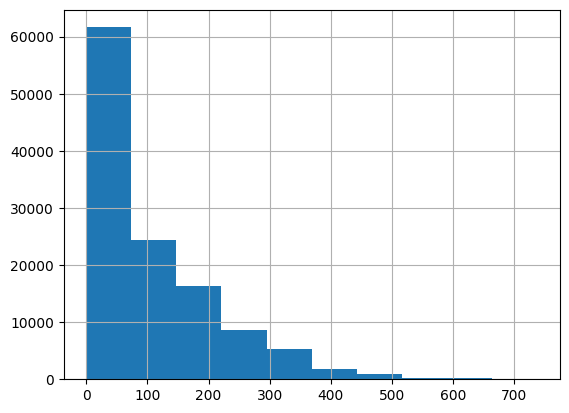

In [14]:
dataframe_reservas_hotel_raw["lead_time"].hist()

,hotel,is_canceled,lead_time
0,Resort Hotel,0,342
1,Resort Hotel,0,737
2,Resort Hotel,0,7
3,Resort Hotel,0,13
4,Resort Hotel,0,14
...,...,...,...
119385,City Hotel,0,23
119386,City Hotel,0,102
119387,City Hotel,0,34
119388,City Hotel,0,109
